In [ ]:
##Importing Libraries
from IPython.display import display, HTML, Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

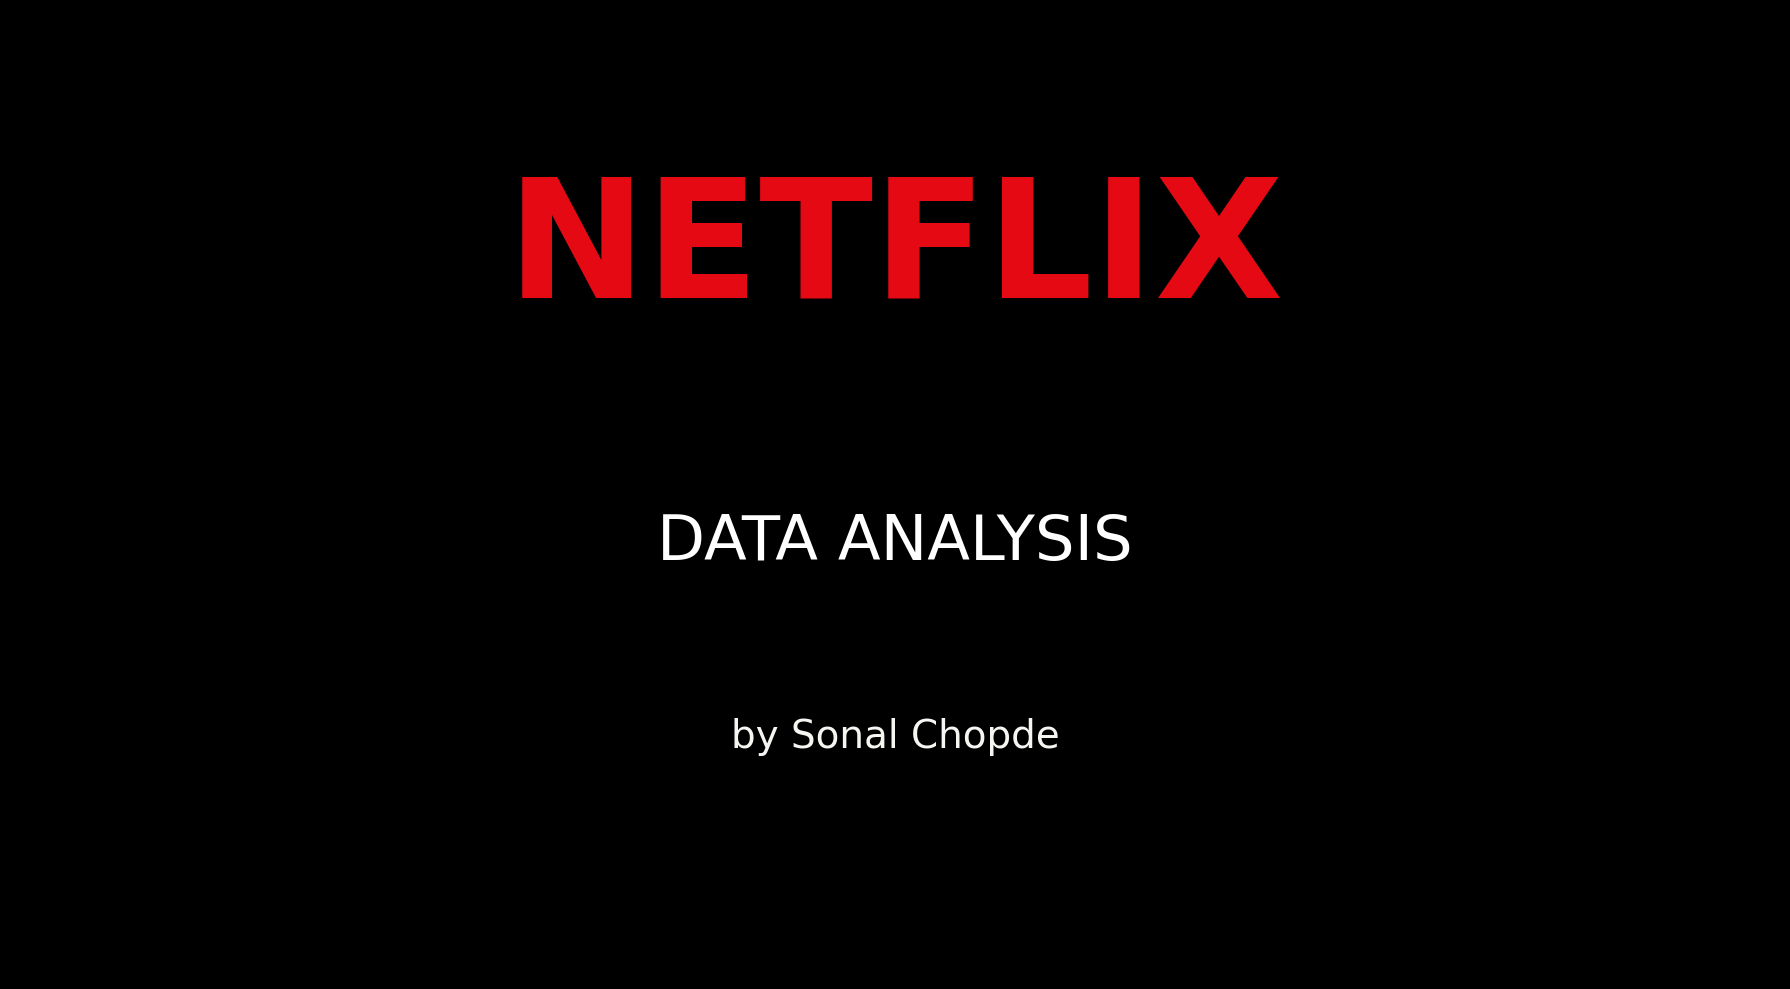

In [3]:
plt.figure(facecolor='black', figsize=(18, 10))
plt.text(0.5, 0.75, 'NETFLIX',
fontsize=120, fontweight='bold',
ha='center', va='center',
color='#E50914',
fontfamily='sans-serif')
plt.text(0.5, 0.45, 'DATA ANALYSIS',
fontsize=45,
ha='center', va='center',
color='white',
fontfamily='sans-serif')
plt.text(0.5, 0.25, 'by Sonal Chopde',
fontsize=28,
ha='center', va='center',
color='#F5F5F1',
fontfamily='sans-serif')
plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
data = pd.read_csv('Dataset_netflix.csv', lineterminator='\n')

In [9]:
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description\r
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description\r    object
dtype: object

In [11]:
data.shape

(8809, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
  8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [13]:
#checking Duplicate in records
duplicates = data.duplicated().sum()
print(f"Number of duplicate records found: {duplicates}")
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

Number of duplicate records found: 0
Shape after removing duplicates: (8809, 12)


In [14]:
#data cleaning
missing_values = data.isnull().sum()
missing_values

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
duration            3
listed_in           0
description\r       0
dtype: int64

In [15]:
data['director'] = data['director'].fillna("Unknown")
data['cast'] = data['cast'].fillna("Not Available")

In [16]:
country_mode = data['country'].mode()[0]
data['country'] = data['country'].fillna(country_mode)

In [17]:
rating_mode = data['rating'].mode()[0]
data['rating'] = data['rating'].fillna(rating_mode)

In [20]:
data['date_added'] = data['date_added'].str.strip()
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data = data.dropna(subset=['date_added'])

In [18]:
duration = data['duration'].mode()[0]
data['duration'] = data['duration'].fillna(duration)

In [21]:
print("Missing values after treatment:")
data.isnull().sum()

Missing values after treatment:


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description\r    0
dtype: int64

In [22]:
data.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description\r            object
dtype: object

In [23]:
data['Date_N'] = pd.to_datetime(data['date_added'], errors='coerce')
data['Year'] = data['Date_N'].dt.year
data['Month'] = data['Date_N'].dt.month_name()

In [ ]:
###Data Visualization


Content Type Distribution:


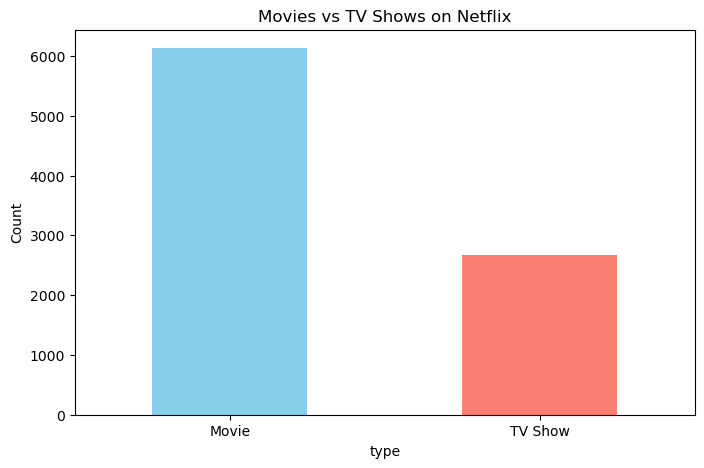

In [24]:
#Content Type Distribution
print("\nContent Type Distribution:")
content_counts = data['type'].value_counts()
content_counts
plt.figure(figsize=(8, 5))
content_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



Year with highest number of releases:


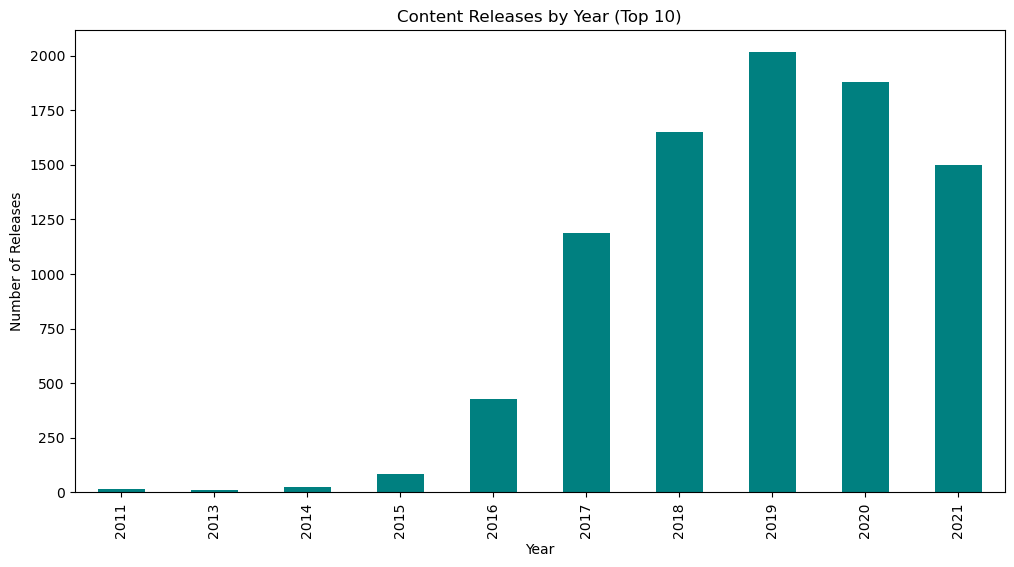

In [25]:
#Year with highest number of releases
print("\nYear with highest number of releases:")
yearly_counts = data['Year'].value_counts().head(10)
yearly_counts
plt.figure(figsize=(12, 6))
yearly_counts.sort_index().plot(kind='bar', color='teal')
plt.title('Content Releases by Year (Top 10)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()



TV Shows released in India:


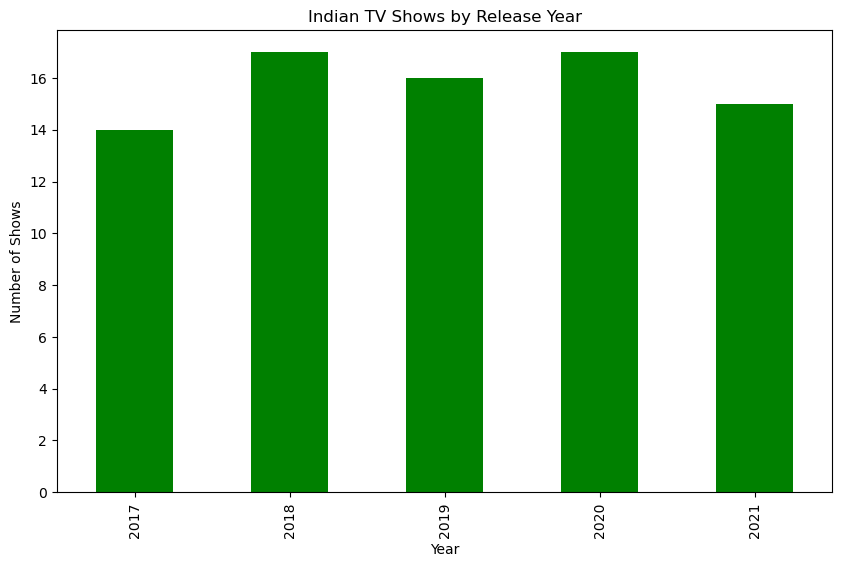

In [26]:
#TV Shows released in India
print("\nTV Shows released in India:")
indian_tv = data[(data['country'] == 'India') & (data['type'] == 'TV Show')]
indian_tv[['title', 'date_added', 'type']]
plt.figure(figsize=(10, 6))
indian_tv['Year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Indian TV Shows by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.show()


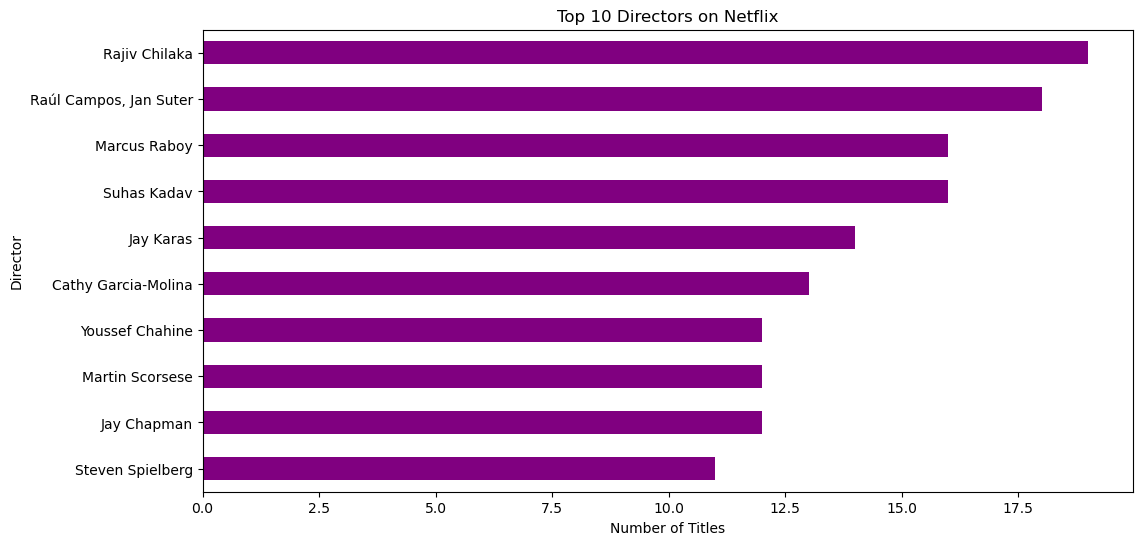

In [27]:
#Top 10 Directors
director_data = data[data['director'] != "Unknown"]
top_directors = director_data['director'].value_counts().head(10)
top_directors
plt.figure(figsize=(12, 6))
top_directors.plot(kind='barh', color='purple')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()
plt.show()


Content Ratings:


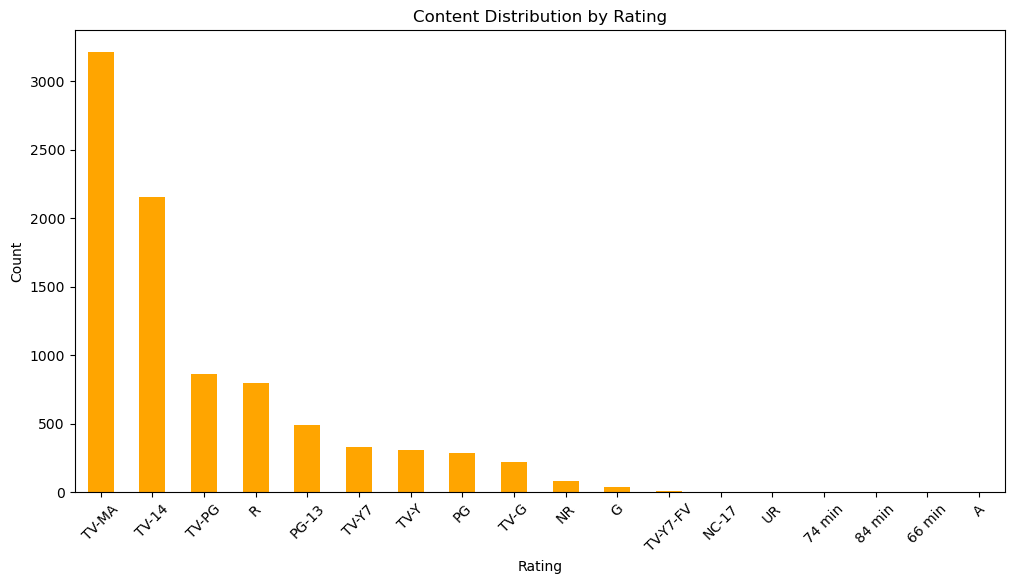

In [28]:
#Content Ratings
print("\nContent Ratings:")
ratings = data['rating'].value_counts()
ratings
plt.figure(figsize=(12, 6))
ratings.plot(kind='bar', color='orange')
plt.title('Content Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Duration analysis:
Longest Movie: 312.0 minutes
TV Show with most seasons: 17.0.seasons


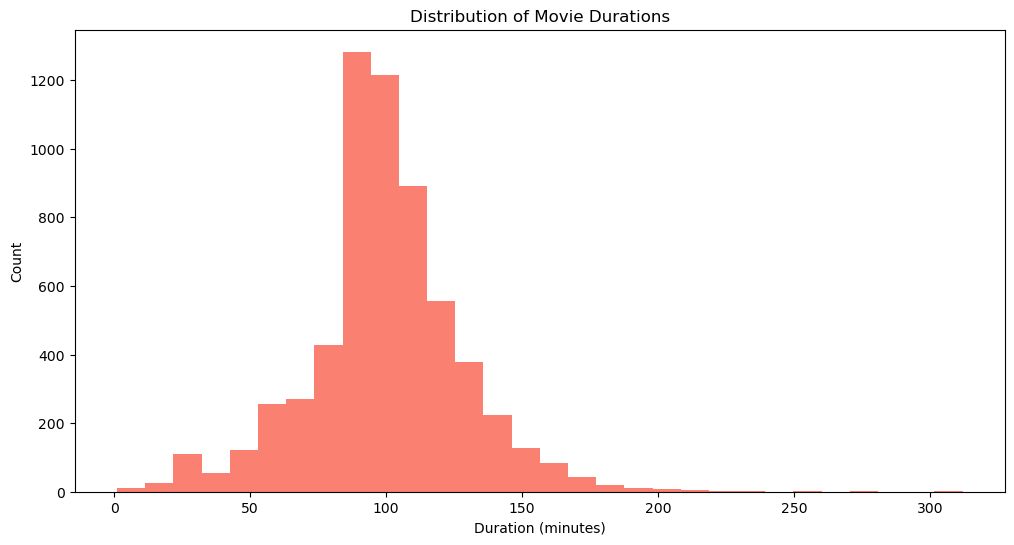

In [31]:
#Duration Analysis
print("\nDuration analysis:")
movies = data[data['type'] == 'Movie'].copy()
movies['Duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)
tv_shows = data[data['type'] == 'TV Show'].copy()
tv_shows['Duration_seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)
print(f"Longest Movie: {movies['Duration_min'].max()} minutes")
print(f"TV Show with most seasons: {tv_shows['Duration_seasons'].max()}.seasons")
plt.figure(figsize=(12, 6))
movies['Duration_min'].plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

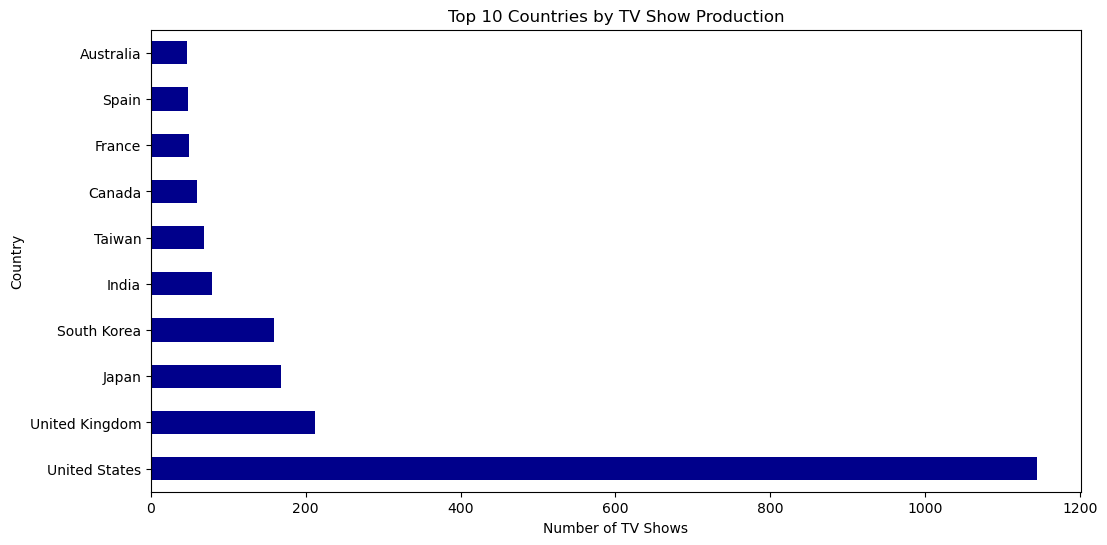

In [33]:
#Country with most TV Shows
country_tv = data[data['type'] == 'TV Show']['country'].value_counts().head(10)
country_tv
plt.figure(figsize=(12, 6))
country_tv.plot(kind='barh', color='darkblue')
plt.title('Top 10 Countries by TV Show Production')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()


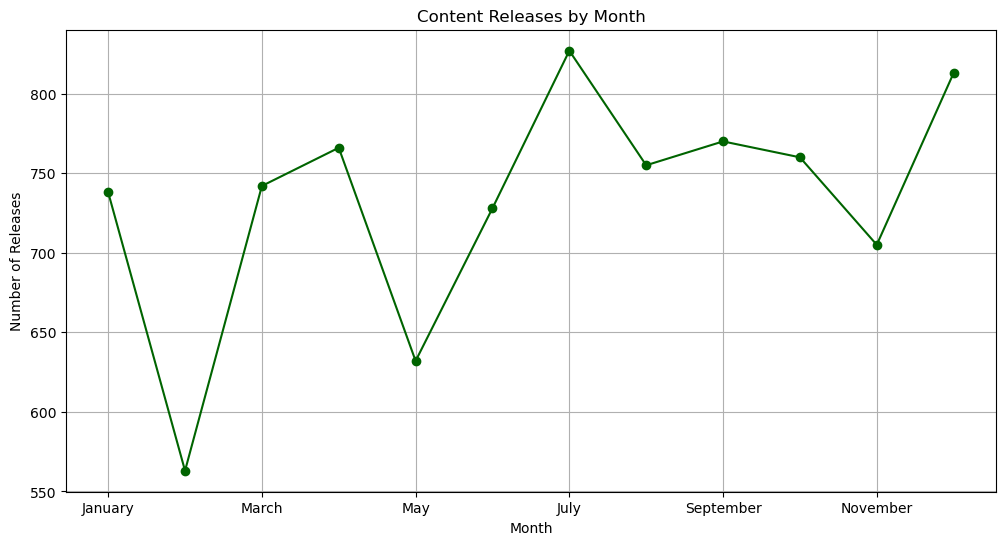

In [34]:
#Monthly release trends
monthly_releases = data['Month'].value_counts()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November','December']
monthly_releases = monthly_releases.reindex(months_order)
plt.figure(figsize=(12, 6))
monthly_releases.plot(kind='line', marker='o', color='darkgreen')
plt.title('Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


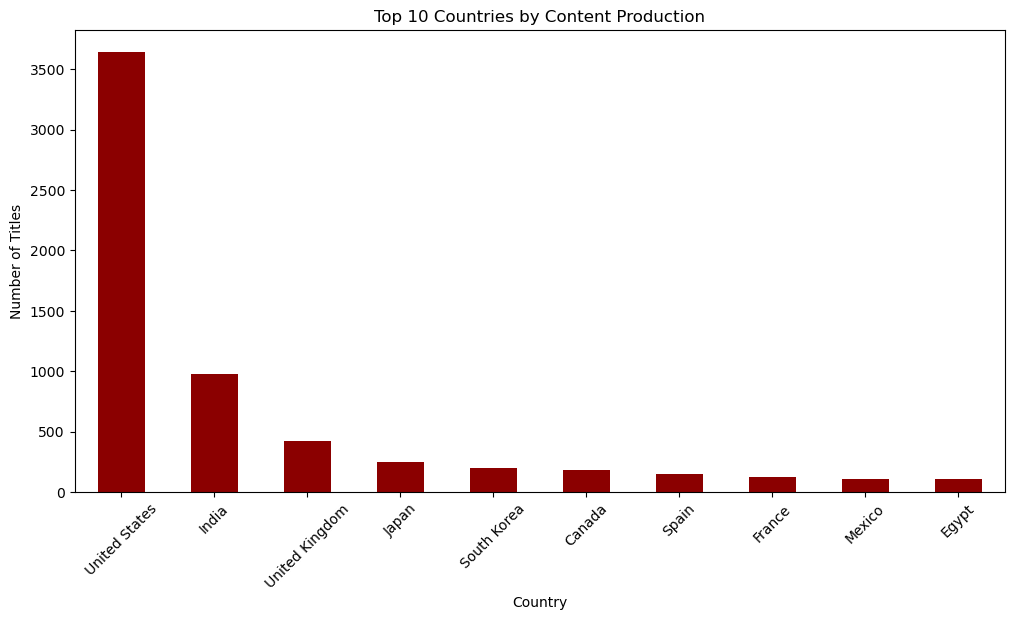

In [35]:
#Content by Country (Top 10)
top_countries = data['country'].value_counts().head(10)
top_countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='darkred')
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


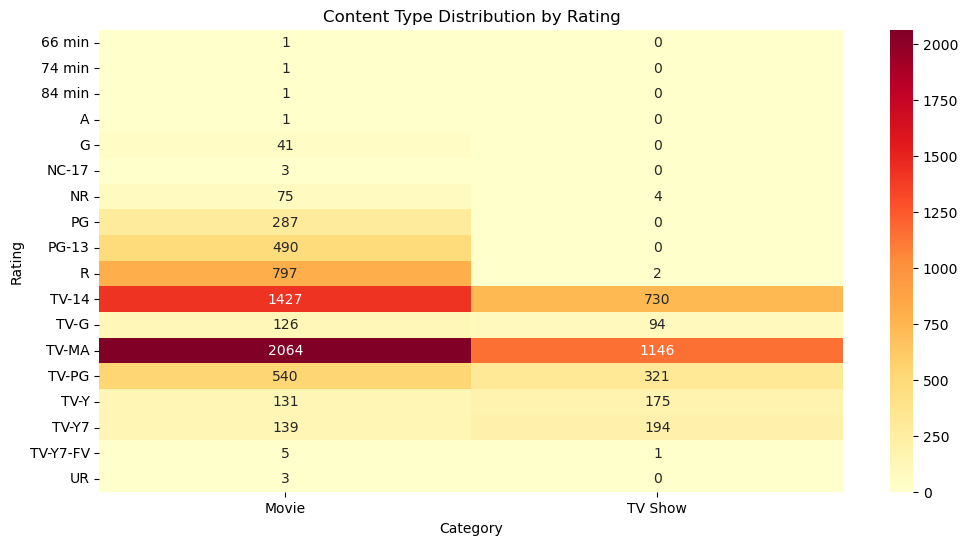

In [37]:
#Content Type Distribution by Rating
rating_by_type = pd.crosstab(data['rating'], data['type'])
rating_by_type
plt.figure(figsize=(12, 6))
sns.heatmap(rating_by_type, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Content Type Distribution by Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()



Average Duration by Rating:


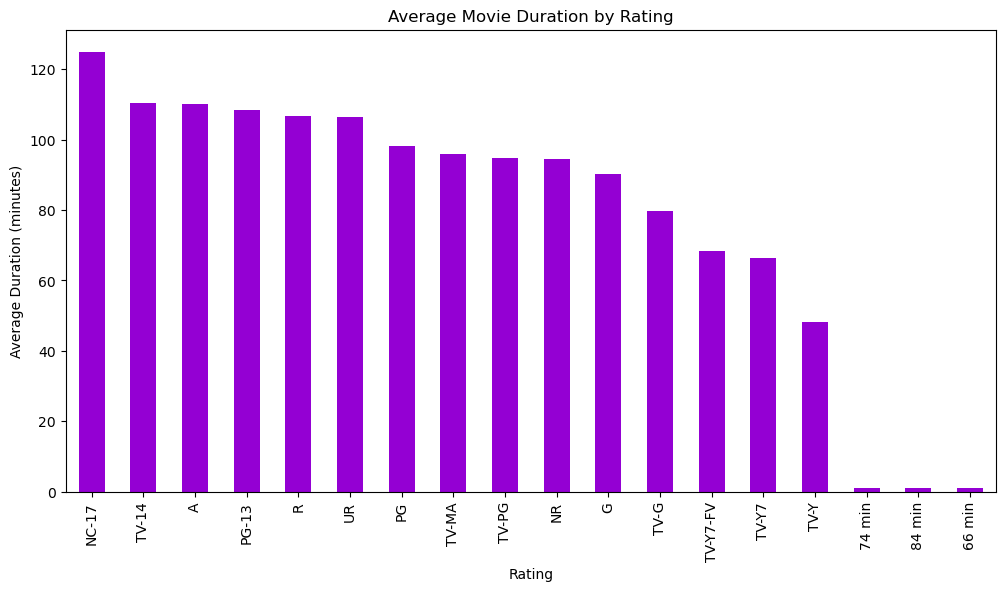

In [39]:
#Duration vs Rating Analysis
print("\nAverage Duration by Rating:")
if not movies.empty:
 duration_by_rating = movies.groupby('rating')['Duration_min'].mean().sort_values(ascending=False)
 duration_by_rating
 plt.figure(figsize=(12, 6))
 duration_by_rating.plot(kind='bar', color='darkviolet')
 plt.title('Average Movie Duration by Rating')
 plt.xlabel('Rating')
 plt.ylabel('Average Duration (minutes)')
 plt.show()
else:
 print("No movie data available for duration analysis")